In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('ExampData.xlsx')
df

,\tEmail,Time on App,Time on Website,Length of Membership
0,mstephenson@fernandez.com,12.66,39.58,4.08
1,hduke@hotmail.com,11.11,37.27,2.66
2,pallen@yahoo.com,11.33,37.11,4.10
3,riverarebecca@gmail.com,13.72,36.72,3.12
4,mstephens@davidson-herman.com,12.80,37.54,4.45
...,...,...,...,...
493,nathan84@lowery.net,12.63,35.54,5.41
494,kellydeborah@chan.biz,13.35,37.97,2.77
495,lewisjessica@craig-evans.com,13.57,36.42,3.75
496,katrina56@gmail.com,11.70,37.19,3.58


In [3]:
# Removing Unnecessary features 
df = df.drop(columns= ['\tEmail'])
df

,Time on App,Time on Website,Length of Membership
0,12.66,39.58,4.08
1,11.11,37.27,2.66
2,11.33,37.11,4.10
3,13.72,36.72,3.12
4,12.80,37.54,4.45
...,...,...,...
493,12.63,35.54,5.41
494,13.35,37.97,2.77
495,13.57,36.42,3.75
496,11.70,37.19,3.58


In [7]:
# Check for null values in the entire DataFrame
print(df.isnull().sum())


Time on App             0
Time on Website         0
Length of Membership    0
dtype: int64


In [9]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
df = pd.DataFrame(std.fit_transform(df), columns=df.columns)
df

,Time on App,Time on Website,Length of Membership
0,0.611754,2.491910,0.543634
1,-0.945779,0.204469,-0.878939
2,-0.724710,0.046032,0.563670
3,1.676905,-0.340159,-0.418105
4,0.752434,0.471833,0.914304
...,...,...,...
493,0.581608,-1.508635,1.876043
494,1.305107,0.897633,-0.768739
495,1.526176,-0.637229,0.213036
496,-0.352912,0.125251,0.042728


In [10]:
# Calculate no.of cluster we need
wcss = []

for i in range(1,11) :
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

wcss

C:\Users\BAPS\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\BAPS\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


[1494.0000000000002,
 1168.3170609090296,
 962.455359528859,
 766.4089716567753,
 676.7986673535249,
 610.4695873471937,
 558.9937019784339,
 514.4988772584134,
 489.3427583843992,
 433.9466188733718]

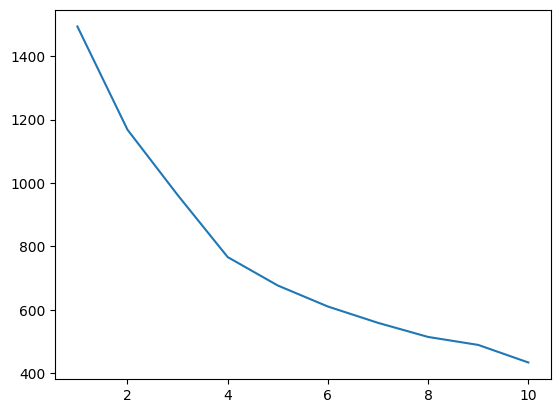

In [11]:
plt.plot(range(1,11),wcss)
plt.show()

In [12]:
# Initialize KMeans with the number of clusters (let's choose K=5 for this example)
kmeans = KMeans(n_clusters=4, random_state=0)

# Fit the model to the scaled data
kmeans.fit(df)

# Get the cluster labels
labels = kmeans.labels_

# Get the cluster centroids
centroids = kmeans.cluster_centers_

print(labels)
print(centroids)

[2 3 3 2 2 0 0 0 2 3 2 3 3 0 1 1 1 3 2 2 3 1 2 0 0 3 0 2 0 0 1 1 0 2 0 3 1
 1 3 0 3 3 0 0 1 3 2 0 1 1 2 3 3 3 2 1 2 1 1 3 2 3 2 3 2 2 0 1 3 3 1 0 3 2
 2 2 1 0 3 1 2 1 2 3 0 0 1 3 0 0 2 2 0 2 0 2 3 2 3 1 1 3 3 1 3 1 0 3 2 2 3
 3 3 1 0 3 1 0 3 2 1 3 3 0 3 0 0 3 1 3 3 2 1 0 1 1 0 1 3 3 0 1 0 3 3 1 2 3
 1 3 3 0 3 0 0 2 0 0 3 3 2 1 2 2 3 2 3 0 1 3 3 2 0 1 3 1 3 0 0 2 3 2 2 3 0
 2 1 2 0 2 3 3 0 0 3 3 1 2 3 1 1 0 3 3 0 2 3 0 1 3 2 0 2 1 1 1 3 0 1 0 3 3
 3 0 3 1 0 2 1 3 0 3 2 3 2 0 2 1 2 3 1 0 3 3 0 3 0 2 1 1 0 1 1 0 1 2 0 0 2
 3 2 2 1 2 0 3 3 1 1 2 2 0 2 0 0 2 3 0 2 1 2 3 2 1 3 1 2 2 1 2 2 1 0 1 3 1
 3 3 0 1 0 2 2 1 1 0 1 3 0 1 1 1 1 0 2 2 1 1 2 2 2 2 0 3 2 1 3 2 3 1 3 2 3
 1 1 3 3 2 3 2 2 3 0 2 3 3 1 3 1 1 2 3 3 0 0 1 2 3 1 2 1 3 3 1 3 2 1 1 0 3
 3 3 1 3 3 1 3 1 1 1 1 2 3 0 1 1 2 1 1 0 1 3 0 1 2 2 0 0 3 1 0 1 2 2 1 3 1
 3 3 0 2 0 1 3 2 3 3 1 0 1 0 0 0 3 3 0 2 2 2 3 3 1 0 1 1 2 0 3 3 2 1 3 1 2
 1 0 0 1 2 2 3 1 3 3 1 1 1 2 3 1 2 0 1 3 2 2 0 1 2 2 1 0 2 1 2 0 3 0 1 3 0
 1 0 1 1 1 0 1 3 1 3 1 3 

In [13]:
df['Cluster'] = labels
df

,Time on App,Time on Website,Length of Membership,Cluster
0,0.611754,2.491910,0.543634,2
1,-0.945779,0.204469,-0.878939,3
2,-0.724710,0.046032,0.563670,3
3,1.676905,-0.340159,-0.418105,2
4,0.752434,0.471833,0.914304,2
...,...,...,...,...
493,0.581608,-1.508635,1.876043,0
494,1.305107,0.897633,-0.768739,2
495,1.526176,-0.637229,0.213036,2
496,-0.352912,0.125251,0.042728,3


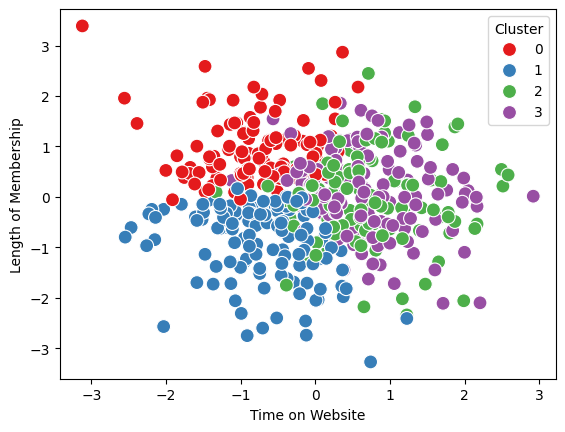

In [15]:
sns.scatterplot(x=df['Time on Website'], y=df['Length of Membership'], 
                hue=df['Cluster'], palette='Set1', s=100)
plt.show()

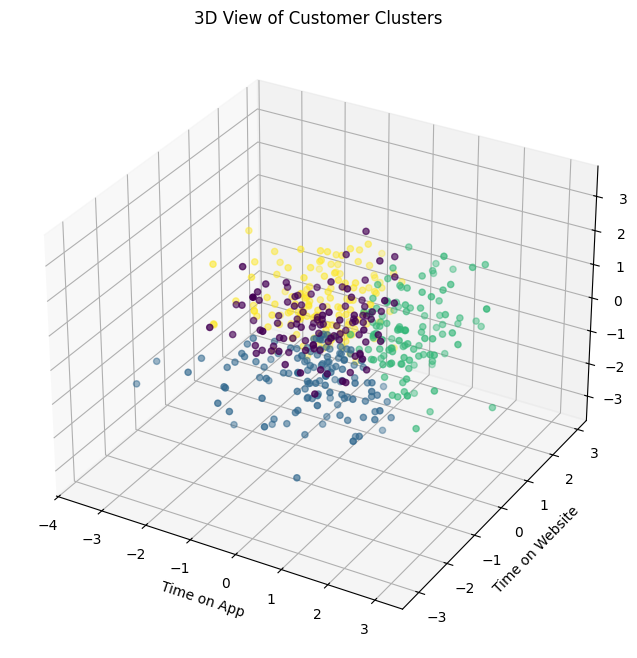

In [21]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Time on App'], df['Time on Website'], df['Length of Membership'], c=df['Cluster'], cmap='viridis')
ax.set_xlabel('Time on App')
ax.set_ylabel('Time on Website')
ax.set_zlabel('Length of Membership')
plt.title('3D View of Customer Clusters')
plt.show()


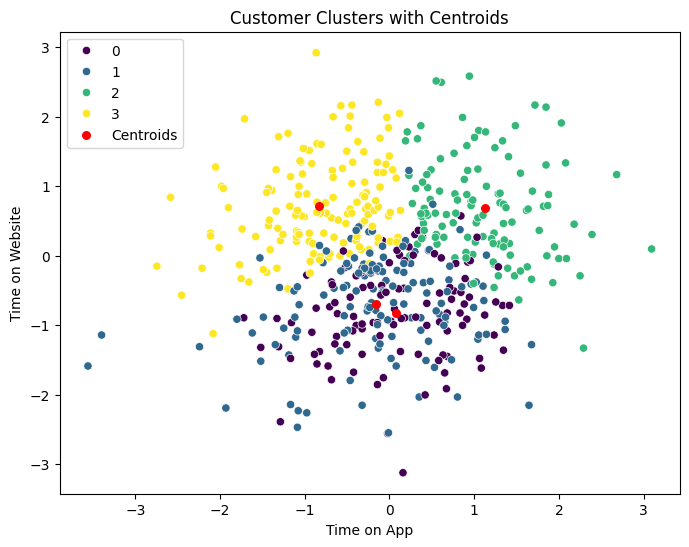

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Time on App', y='Time on Website', hue=kmeans.labels_, data=df, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=30, c='red', marker='o', label='Centroids')
plt.title('Customer Clusters with Centroids')
plt.legend()
plt.show()


In [27]:
# Get the cluster centroids in the standardized space
centroids = kmeans.cluster_centers_

# Inverse the standardization to get centroids back to the original scale
original_centroids = std.inverse_transform(centroids)

# Create a DataFrame for better readability
centroid_df = pd.DataFrame(original_centroids, columns=df.columns[:-1])  # Exclude the 'Cluster' column
print("Centroids in original scale:")
print(centroid_df)


Centroids in original scale:
   Time on App  Time on Website  Length of Membership
0    12.131792        36.228585              4.505094
1    11.896090        36.355113              2.671729
2    13.170603        37.756983              3.544483
3    11.227692        37.778741              3.619301
